In [2]:
import pandas as pd 
import numpy as np

In [4]:
wine = pd.read_csv('Wine.csv')
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

In [5]:
# scaling
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X = mmscaler.fit_transform(X)


In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
#ensemble Learing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
print(y_pred)
print("accuracy score: ",accuracy_score(y_test,y_pred))

[1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1]
accuracy score:  1.0


In [8]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100,500,800],
    "criterion": ["gini","entropy"],
}

gd = GridSearchCV(rfclf,param_grid,scoring="accuracy")
gd.fit(X_train,y_train)
print("best params: ",gd.best_params_)
print("best score: ",gd.best_score_)

best params:  {'criterion': 'gini', 'n_estimators': 100}
best score:  0.9785714285714286


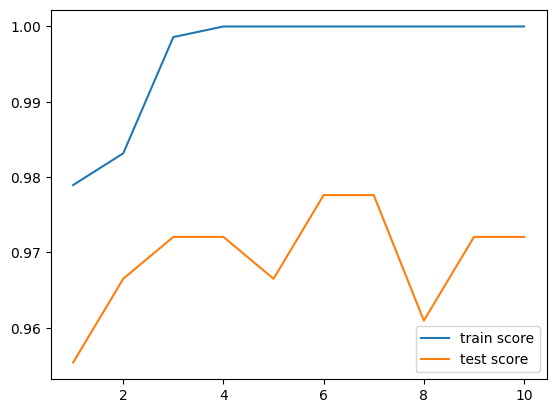

In [10]:
# from sklearn.model_selection import validation_curve
# import matplotlib.pyplot as plt

# param_range = np.arange(1,11)
# train_score, test_score = validation_curve(rfclf,X,y,param_name="max_depth",param_range=param_range,scoring="accuracy")

# train_mean = np.mean(train_score,axis=1)
# test_mean = np.mean(test_score,axis=1)

# plt.plot(param_range,train_mean,label="train score")
# plt.plot(param_range,test_mean,label="test score")
# plt.legend()
# plt.show()

mean of train score:  [0.98439829 0.98439441 0.99813665 1.         1.         1.
 1.         1.         1.         1.        ]
mean of test score:  [0.95       0.97189542 0.98333333 0.97777778 0.98333333 0.98888889
 0.98888889 0.98333333 0.96666667 0.97777778]


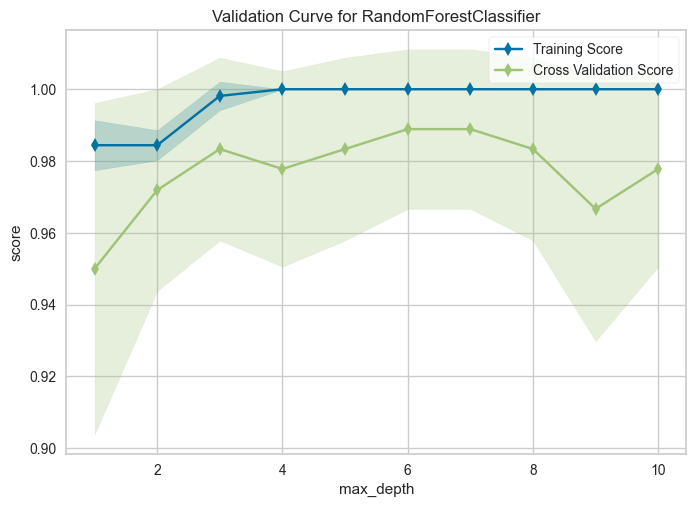

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [35]:
# validation curve
from yellowbrick.model_selection import ValidationCurve

# Create a validation curve visualizer
plot = ValidationCurve(
    rfclf,
    param_name="max_depth",
    param_range=np.arange(1, 11),
    cv=10,
    scoring="accuracy",
)

# Fit and display the visualizer
plot.fit(X, y)
print("mean of train score: ",plot.train_scores_mean_)
print("mean of test score: ",plot.test_scores_mean_)
plot.show()